### Christian Roth und Andreas Waßmus:

# Major Assignment: Used Car Sales Analysis


### Kurs: Programming for Data Science
### Programmiersprache Python

Angewendete Pakte:

In [2]:
import pandas as pd
import numpy as np

### 1. Beschreibung Use Case

Der Verkauf von Kraftfahrzeugen (PKW) ist in Deutschland ein großer und wichtiger Absatzmarkt. Untergliedert in Neu- und Gebrauchtwagen hat er in 2019 ein Volumen von 191,7 Mrd. EUR. Dabei macht der Verkauf von Gebrauchtwagen mit einen Umsatz von 84,7 Mrd. EUR 44,2% des Marktes aus. Der Gebrauchtwagen ist zu zwei Dritteln gewerblich und einem Dittel privat organisiert. Ca. 5 Mio. Deutsche überlegen sich in den kommenden Jahren einen neuen Gebrauchtwagen zuzulegen. (Quelle: destatis, abgerufen am 23.08.2019, https://de.statista.com/themen/1377/gebrauchtwagenhandel/)


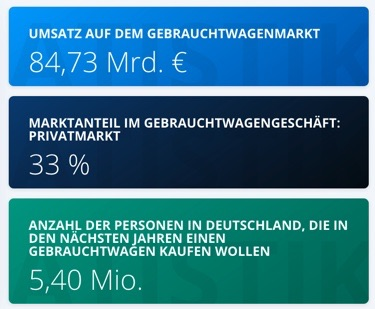


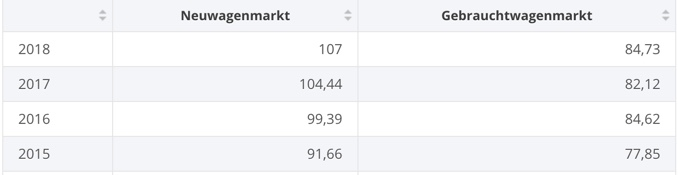


Im vorliegenden Assignment wird eine deskriptive Analyse des Gebrauchtwagenmarktes in Deutschland durchgeführt. Zu diesem Zweck wird auf einen Datensatz über Gebrauchtwagenkäufe aus dem Jahr 2016 einbezogen. Diese wird mit weiteren Datenpunkten gezielt angereichert, um zusätzliche regionale bzw. geographische Aspekte sowie Unternehmenszugehöritgkeiten von Marken darzustellen.  

Folgenden Fragestellungen soll im Rahmen dieses Assignments nachgegangen werden:

Welche Marktanteile von Marken gibt es im Gebrauchtwagenmarkt?
- Wie sieht die Verteilung der Marktanteile in Bezug auf Automobilkonzerne dar?
- Gibt es einen Unterschied zwischen der Verteilung der Marktanteile bei Neuwagen und Gebrauchtwagen?

weitere Marktcharakteristika:
- Wie viel Kilometer haben die Autos durchschnittlich gefahren?
- Wie sieht die Verteilung bei Diesel und Benzin aus?
- Wie lange ist eine Anzeige durchschnittlich online, bis das Auto verkauft wird?
- Wie viel PS haben die Autos?
- Welches Alter haben die Autos?
- Welche Fahrzeugform haben die Autos?

Wie entwickeln/unterscheiden sich die Preise?
Welche Fahrzeuge erzielen höhere Verkaufspreise?
- Welche Merkmale eines Autos haben einen Einfluss auf die Angebotspreise?
- Wie sieht die Verteilung der Preise für PKW in Bezug auf das Zulassungsjahr aus?
- Wie sieht die Verteilung der Preise in Bezug auf Kilomterleistung aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Leistung von PKW aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Kraftstoffart aus?
- Welche Marken erzielen die höchsten Preise?

Wie ist der Markt geografisch aufgeteilt?
- Wo werden besonders viele Autos angeboten bzw. verkauft?
- Gibt es höhere Preise in bestimmten Regionen in Deutschland beim Gebrauchtwagenverkauf?

### 2. Daten


Wir haben für die Auswertung einen Datensatz aus Kaggle verwendet. Diese Daten wurden im Jahr 2016 mit Scrapy von Ebay-Kleinanzeigen gecrawled. Es handelt sich um 371.528 Datensätze.

Datensatz: https://www.kaggle.com/orgesleka/used-cars-database




#### 1. Beschreibung der Daten:

##### Hauptdatensatz:

Folgende 19 Datenpunkte wurden gesammelt:

- dateCrawled: Datum, wann die Anzeige das erste mal gecrawlt wurde (alle Feldwerte stammen von diesem Datum)
- name: "Name" des Autos (Anzeigenname)
- seller: Gewerblicher oder privater Verkäufer
- offerType: Bei allen Datenpunkten handelt es sich um Angebote (diese Spalte ist für die Analyse nicht relevant)
- price : Der Angebotspreis der Anzeige (kein finaler Verkaufspreis) 
- abtest: Ausprägungen "test" und "control" (diese Spalte ist für die Analyse nicht relevant)
- vehicleType: Fahrzeugform, Kategorien von verschiedenen Fahrzeugtypen
- yearOfRegistration: Jahr der Erstzulassug
- gearbox: Getriebeart
- powerPS: Leistung in PS
- model: Modellname des Herstellers
- kilometer: Kilometerstand bei Verkauf
- monthOfRegistration: Monat der Erstzulassung
- fuelType: Kraftstoffart
- brand: Automarke
- notRepairedDamage: Nicht-reparierter Schaden am Auto (Variable lässt keine Aussage über die Höhe der unfallfreien Fahrzeuge zu
- dateCreated: Erstelldatum der Anzeige
- nrOfPictures: Fehlerhafter Spalte wird im Rahmen der Datenbereinigung aus Analyse entfernt
- postalCode: Postleitzahl
- lastSeenOnline: Wann wurde die Anzeige das letzte Mal vom crawler gesehen?






In [5]:
#Initialize relative path of csv-file
relpathCar="../MajorAssignment/used-cars-database/autos.csv"
relpathPLZ="../MajorAssignment/PLZ.csv"

#import csv-file into pandas df
carData=pd.read_csv(relpathCar,sep=",",encoding="latin-1", index_col=0)

#show head of carData df
#carData.head(5)

FileNotFoundError: [Errno 2] File b'../MajorAssignment/used-cars-database/autos.csv' does not exist: b'../MajorAssignment/used-cars-database/autos.csv'

In [4]:
print(carData.shape)
print('----------')
print(carData.columns)

NameError: name 'carData' is not defined

#### 2. Einbindung zusätzlicher Daten

Der Hauptdatensatz wurde dahingehend überprüft, ob es Sinn macht, an bestimmten Stellen Daten anzureichern. Hierzu kommen zwei Spalten in Betracht:
- brand
- postalCode

Zur Marke (brand) der PKWs wird eine CSV-Tabelle mit Konzernzugehörigkeiten der einzelnen Marken eingespielt. Diese CSV wurde selbst erstellt, da keine freiverfügbare Liste oder CSV-Datei gefunden wurde und ein Crawling-Prozess zu aufwendig zu programmieren gewesen wäre (Es gab keine strukturierte Abfragemöglichkeit, wie bspw. bei Assignment 04 in Wikipedia, sodass die Information aus unstrukturierten Daten herausgelesen hätte werden müssen. In Anbetracht des Informationsgehalts dieser Tabelle ist dieses Prozedere zu aufwendig). 

Bzgl. der Postleitzahlen (postalcode) wurden mehrer Datenbanken durchsucht und verschiedene CSV-Dateien gefunden, sodass mit deren Hilfe zu den Postleitzahlen der Name des Orts, die Fläche des Orts in km^2 sowie die Einwohnerzahl hinzugefügt werden können.Diese Dateien wurden von https://www.suche-postleitzahl.org/downloads und https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/05-staedte.html heruntergeladen (24.08.2019).



hier ppt über die datenquellen einfügen 

hier gibt es noch die Möglichkeit die Einwohnerdichte hinzuzufügen. Dann könnte man die Preise nicht nur geographisch sondern auch nach ballungszentren analysieren.


In [1]:
#Initialize relative path of csv-file
relpathKON="../MajorAssignment/Autokonzerne_neu.csv"
relpathPLZ="../MajorAssignment/PLZ.csv"
relpathEIN="../MajorAssignment/plz_einwohner.csv"

In [219]:
#Einwohner je PLZ einlesen
df_population=pd.read_csv(relpathEIN,sep=",",encoding="UTF-8")

#Quelle http://www.fa-technik.adfc.de/code/opengeodb/PLZ.tab
#Alternative wäre geopy gewesen, aber funktioniert bei sovielen Zeilen wegen HTTP429 To many requests nicht
df_lonlat = pd.read_csv(relpathPLZ, sep='\t', encoding="utf-8")

#Konzernmarken einlesen
df_companies=pd.read_csv(relpathKON,sep=",",encoding="UTF-8")

In [220]:
#df_population und df_lonlat auf Basis von plz zusammenführen
df_postalCodeInfo = df_lonlat.merge(df_population, on='plz', how='left')

### 3. Data preparation

In diesem Abschnitt werden die Daten aufbereitet und bereinigt, so dass sie im Anschluss analysiert werden können. 

#### Übersicht und Einfinden in die Datensätze

In [221]:
#show head of carData df
carData.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [222]:
#Ausprägungen einer Spalte anzeigen lassen
carData["model"].value_counts()

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ibiza                  2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

In [223]:
#Check dtypes
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen               371528 non-null obj

#### Umgang mit fehlenden und nicht benötigten Werten:

Grundsätzlich gibt es drei Möglichkeiten, mit den fehlenden Werten umzugehen: 

- 1. Wir löschen alle unvollständigen Datensätze.
- 2. Wir belassen die unvollständigen Datensätze im Dataset und verwenden verwenden für bestimmte Analyse nur die vollständigen Datensätze.
- 3. Wir ersetzen die fehlenden Werte.

Für die hier durchgeführte deskriptive Analyse reicht es zunächst aus, die NaN values im Datensatz zu belassen. Zur eindeutigen Kennzeichnung werden diese mit einen (-) ersetzt. Wir gehen somit mit Option zwei vor und werden, falls notwendig, für bestimmte deskriptive Analysen (bspw. Korrelationen) nur vollständige Datensätze zulassen. Für weitergehende Analysen ist zu prüfen, inwieweit diese Werte ersetzt werden können.

Im ersten Schritt wird der Datensatz um Gesuche bereinigt, sodass nur Angebote im Datensatz vorhanden sind. Gleichzeitig werden die Spalten "nrOfPictures", "offerType", "abtest" und "seller" gelöscht, da diese Spalten keinen Mehrwert für die nachfolgenden Analysen generieren und somit nicht benötigt werden.

In [224]:
#12 Gesuche, 371516 Angebote...--> Deshalb drop die 12 Gesuche 
carData = carData[carData.offerType != "Gesuch"]

#drop not used columns - delete the columns without having to reassign (inplace)
carData.drop(['nrOfPictures','seller', 'offerType', 'abtest'], axis=1, inplace=True)

In [225]:
#Check NaN values 
carData.isna().sum()

name                       0
price                      0
vehicleType            37862
yearOfRegistration         0
gearbox                20203
powerPS                    0
model                  20481
kilometer                  0
monthOfRegistration        0
fuelType               33379
brand                      0
notRepairedDamage      72054
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

NaN-Werte werden mit "-" ersetzt.

In [226]:
#Fill missing values with "-"
carData = carData.fillna("-")
carData.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,480,-,1993,manuell,0,golf,150000,0,benzin,volkswagen,-,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,-,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,-,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


Erneute Überprüfung ob alle fehlenden Werte ersetzt wurden

In [227]:
completeData_df.isna().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
#loc_id                0
plz                    0
lon                    0
lat                    0
Ort                    0
einwohner              0
dtype: int64

Die Spalte "monthOfRegistration" enthalt 37.675 Datensätze mit dem Wert null.
Diese Werte werden ebenfalls mit (-) ersetzt oder
Für diese Werte wird die Mitte eines Jahres angenommen, um das Alter der Fahrzeuge zu berechnen.

In [205]:
#37675 wurden im Monat 0 zugelassen, was machen wir mit denen? -
carData['monthOfRegistration'].value_counts()

0     37590
3     36113
6     33112
4     30878
5     30579
7     28922
10    27298
11    25458
12    25351
9     25046
1     24523
8     23711
2     22372
Name: monthOfRegistration, dtype: int64

#### Einbinden von Postleitzahlen, Einwohner und Fläche

Zunächst wird die Spalte "postalCode" aus dem carData Dataframe extrahiert und in ein neues Dataframe geschrieben. 

In [228]:
#Create df with unique postalCode values from carData
df_carData_postalCode = pd.DataFrame(carData['postalCode'].unique(),  columns=['plz']) 
df_carData_postalCode.head()

,plz
0,70435
1,66954
2,90480
3,91074
4,60437


Im Anschluss daran wird das anfangs eingelesene Dataframe "df_postalCodeInfo" mit dem soeben erstellen Dataframe zusammengeführt. 

In [229]:
df_locationData = df_carData_postalCode.merge(df_postalCodeInfo, on='plz' )

In [230]:
df_locationData.head()

,plz,#loc_id,lon,lat,Ort,einwohner
0,70435,9703,9.159157,48.830653,Stuttgart,206.0
1,66954,9414,7.564295,49.202121,Pirmasens,10417.0
2,90480,11724,11.132551,49.447293,Nürnberg,18393.0
3,91074,11774,10.878277,49.572095,Herzogenaurach,22222.0
4,60437,9033,8.678966,50.199217,Frankfurt am Main,3123.0


Abschließend werden für dieses DF ebenfalls die NaN-Werte geprüft und ggf. gelöscht.

In [231]:
#Check missing values 
df_locationData.isna().sum()

plz           0
#loc_id       0
lon           0
lat           0
Ort           0
einwohner    67
dtype: int64

In [233]:
#Check wieviele PLZ, welche in in df1 vorhanden sind, in df2 gefunden werden können?
#df_locationData['plz'].isin(carData['plz']).value_counts()

### 4. Analyse des Marktes

In [211]:
#Könnten wir ein pie chart drauß machen mit denen > 10.000 (Rest Sonstige)
carData['brand'].value_counts()

volkswagen        79481
bmw               40232
opel              40084
mercedes_benz     35278
audi              32818
ford              25539
renault           17941
peugeot           11012
fiat               9669
seat               7015
mazda              5674
skoda              5628
smart              5241
citroen            5175
nissan             5033
toyota             4689
sonstige_autos     3973
hyundai            3643
mini               3391
volvo              3320
mitsubishi         3053
honda              2835
kia                2553
alfa_romeo         2345
suzuki             2316
porsche            2214
chevrolet          1839
chrysler           1440
dacia               896
daihatsu            806
jeep                806
subaru              777
land_rover          769
jaguar              621
trabant             583
daewoo              540
saab                528
rover               490
lancia              483
lada                223
Name: brand, dtype: int64

Idee...

Man könnte mit der Formel basierend auf den Verkaufspreisen den ursprünglichen Neuwagenpreis errechnen. Allerdings ist das schon sehr generell, da diese aus dem gesamten Datensatz abgeleitet wurde.
http://orgesleka.blogspot.com/2016/11/tabelle-zum-wertverlust-pro-jahr-bei.html

Eine individuelle regression zu bauen geht aus meiner Sicht über das Assignment hinausnicht.